<a href="https://colab.research.google.com/github/Kekoa-Pickett/ML-HW2/blob/main/Clustering_and_Dimensional_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: Due Sunday 11:59pm

In this assignment, we are working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply Agglomerative Clustering, K-means Clustering, and PCA to this dataset. <br >

## Background and Data Information
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset.

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

### Libraries that can be used: numpy, scipy, pandas, scikit-learn, matplotlib, seaborn
Any libraries used in the discussion and lecture materials are also allowed.

In [1]:
!git clone https://github.com/ucsd-cse151a-f24/hw3.git

Cloning into 'hw3'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 38 (delta 18), reused 38 (delta 18), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 649.70 KiB | 2.94 MiB/s, done.
Resolving deltas: 100% (18/18), done.


# Exercises
## Exercise 1 - Agglomerative Clustering (20 points in total)

Using agglomerative clustering with a distance threshold for early stopping, we can calculate the number of equivalence classes by counting the number of clusters. In order to perform agglomerative clustering, we have to consider what parameters may be used: <br >

### Exercise 1.1 - Choosing Parameters (5 points)

 - Explain why you would pick these parameters.
     - Which linkage rule should be used? (single-linkage, complete-linkage, or average-linkage)
     - Which distance function should be used? (Euclidean distance, Manhattan distance, or cosine distance)
     - What should the threshold distance be?

Hints:
 - How the distance threshold works: Whenever two clusters are picked to consider merging them, the distance between those clusters is compared to the distance threshold. If the distance is smaller than the threshold, the clusters merge and the algorithm continues; Otherwise, they will not be merged.
 - How to choose a linkage rule: Think about how you would figure out which equivalence class the string $0001$ belongs to in the previously given example.

Ans: I would use single-linkage because it only needs to be linked to one other object to be added to the group so it would allow paths. I will use the manhattan distance function because the distance should onl move by 1 on one axis so the rise or run should only change.My threshold should be 2 because the max is one number switching so any change of 2 or more gets removex.

In [4]:
import pandas as pd
df = pd.read_csv('./hw3/bitstrings.csv') # change filename location based on your setup

### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (15 points)

 - Perform the agglomerative clustering with the parameters you picked in the above three questions.
 - Show the frequency(number of members) of each cluster. You are encouraged to create a bar chart to show the distribution as it will help you in Exercise 2, but printing only the numbers is also fine.

Hints:
 - The value of ```distance_threshold``` in the arguments should be **slightly** higher than what you picked. This is because we only merge two clusters when their distance is **strictly smaller** than the threshold.

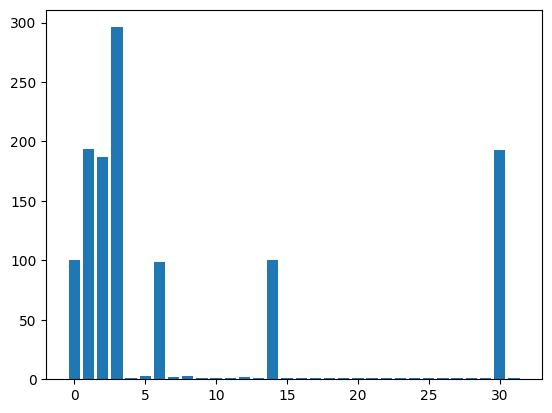

[3 3 3 ... 2 2 2]
cluster
3     296
1     194
30    193
2     187
14    100
0     100
6      99
5       3
8       3
7       2
12      2
11      1
13      1
18      1
16      1
4       1
9       1
19      1
28      1
24      1
20      1
22      1
27      1
10      1
29      1
17      1
26      1
23      1
31      1
25      1
21      1
15      1
Name: count, dtype: int64


In [13]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

agg_clustering = AgglomerativeClustering(n_clusters=None, metric='manhattan', linkage='single', distance_threshold=2)

# Fit the model to your data
agg_clustering.fit(df)

df['cluster'] = agg_clustering.labels_
plt.bar(df['cluster'].value_counts().index, df['cluster'].value_counts())
plt.show()
print (agg_clustering.labels_)
print (df['cluster'].value_counts())

## Exercise 2 - K-Means Clustering (20 points in total)

Let's see how k-means behave differently from agglomerative clustering.

### Exercise 2.1 - K-Means Clustering for Equivalence Classes (10 points)
 - Re-cluster the dataset with k-means, but with the number of clusters you obtained from Exercise 1.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.

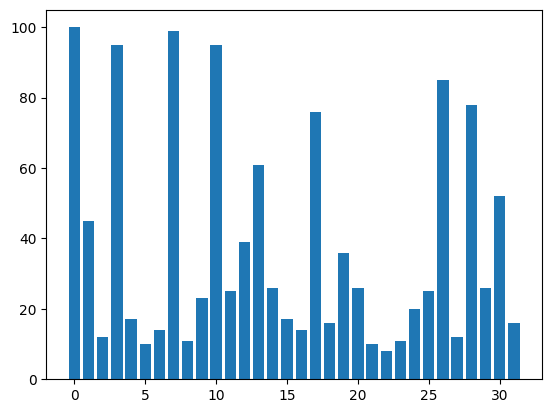

In [15]:
import numpy as np
from sklearn.cluster import KMeans
k_means_clustering = KMeans(n_clusters=len(np.unique(agg_clustering.labels_)))
k_means_clustering.fit(df)
df['cluster'] = k_means_clustering.labels_
plt.bar(df['cluster'].value_counts().index, df['cluster'].value_counts())
plt.show()

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering (10 points)

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain
 - How the two results are different
 - Why there is such a difference

The results are so different because in in Agglomrative Clustering, we organized by connection to another point which is why there was one huge cluster that probably was way more spread out than K-means Clustering. In K-means Clustering, we group by a size which stops one cluster from capturing chains and allows relatively closer points to be included.

## Exercise 3 - Principal Component Analysis (30 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 3.1 - Generate 2 Clusters (10 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

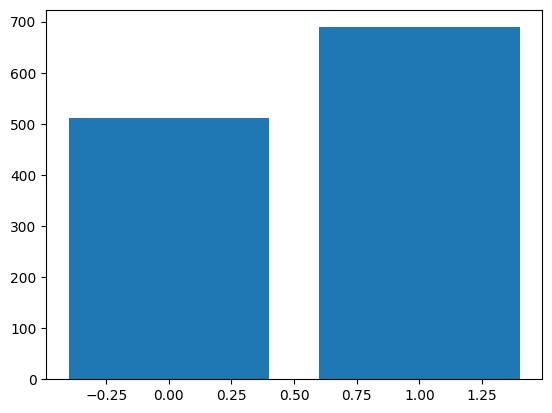

k_means_dos
1    689
0    511
Name: count, dtype: int64


In [18]:
k_means_cluster_dos = KMeans(n_clusters=2)
k_means_cluster_dos.fit(df)
df['k_means_dos'] = k_means_cluster_dos.labels_
plt.bar(df['k_means_dos'].value_counts().index, df['k_means_dos'].value_counts())
plt.show()
print (df['k_means_dos'].value_counts())

### Exercise 3.2 - PCA for Feature Extraction (20 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

## Exercise 4 - Singular Value Decomposition (30 points in total)

Let's decompose our data set into left and right matrices to find unknown structure in our data

### Exercise 4.1 - Generate the [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) (10 points)

 - Generate multiple SVD's using 2, 3 and 4 components ```k=2, k=3 and k=4```.
 Give each SVD it's own python variable.
 - Calculate a pairwise cosine similarity of our kxn matrix for n features (should result in an nxn matrix)
 - Generate Pair plots for the left and right matrices.
 - Evaluate your results and what can you extract from the results of k=2, k=3 and k=4 dimensional reductions?

**Before performing SVD, let's first calculate our Eigen values and Eigen vectors of our matrix**

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(np.array(df).T @ np.array(df))

In [ ]:
# Let's evaluate our values. You can use this for your final evaluation for 4.1
eigen_values

In [ ]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Here we generate an SVD using k = 5 yielding u,s,v of mx5, 5x5, nx5.T
svd = TruncatedSVD(n_components=5, n_iter=1000, random_state=76)

In [ ]:
svd.fit(df)
print(svd.explained_variance_ratio_) # Prints the explained variance for each of the 5 components
print(svd.explained_variance_ratio_.sum()) # Prints the sum of the 5 from above
sigma_matrix = np.diag(svd.singular_values_) # Creates the sigma matrix from the singular values
print(sigma_matrix) # Prints the sigma matrix
singular_vals = svd.singular_values_ # Our singular values
print(singular_vals) # Prints singular values as a vector

In [ ]:
# We will define our cosine similarity function
def cosine_similarity(a, b):
    """Calculates the cosine similarity between two vectors."""
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [ ]:
right_matrix = pd.DataFrame(svd.components_)
right_matrix.shape # lets check the shape

In [ ]:
right_matrix

**Generate code for performing a pairwise calculation of our features using cosine_similarity**

**Let's extract our left matrix** This is similar to looking at customers with similar movie viewing habits

In [ ]:
left_matrix = pd.DataFrame(svd.fit_transform(df))/singular_vals
left_matrix.shape

In [ ]:
left_matrix

**Explain your interpretation for each of the SVD's you generated for k=2, 3, 4**

### Exercise 4.2 - Generate Clusters (10 points)

 - Re-do the k-means clustering on our dataset again for the three different components created by you above, of the left matrix.
 - Show the frequency (number of members) of each cluster.
 - Generate clusters from 2 to 10
 - Use the [silhouette](https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) method to choose the best k clusters

## Exercise 4 - Collaborative Statement (5 points)
### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I completed this assignment independently and did not discuss specifics in this assignment with anyone.